In [ ]:
# Importando os pacotes necessários

%matplotlib inline

import os
import random
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from six.moves import urllib
import gzip

from shutil import copyfile

# import the needed packages
# import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

In [ ]:
# Baixando o conjunto de dados de cães e gatos

!echo "Downloading catsanddogs for image notebooks"
!curl -L -o kagglecatsanddogs_5340.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip #download

# As instruções para preparar o conjunto de dados são para Linux ou macOS

!unzip kagglecatsanddogs_5340.zip
!rm kagglecatsanddogs_5340.zip
!ls


A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: PetImages/Dog/55

In [ ]:

# exibindo a quantidade de imagem

print(len(os.listdir('/content/PetImages/Cat')))
print(len(os.listdir('/content/PetImages/Dog')))

12501
12501


In [ ]:
# Crinando diretórios para separar as imagens em Treino e Teste

try:
    os.mkdir('cats-v-dogs')
    os.mkdir('cats-v-dogs/training')
    os.mkdir('cats-v-dogs/testing')
    os.mkdir('cats-v-dogs/training/cats')
    os.mkdir('cats-v-dogs/training/dogs')
    os.mkdir('cats-v-dogs/testing/cats')
    os.mkdir('cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
#  Função para separar o conjunto de dados em treino e teste
#  E limpando as imagens com comprimento zero

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "PetImages/Cat/"
TRAINING_CATS_DIR = "cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "PetImages/Dog/"
TRAINING_DOGS_DIR = "cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [ ]:

# exibindo a quantidade de imagem por diretórios


print(len(os.listdir('cats-v-dogs/training/cats/')))
print(len(os.listdir('cats-v-dogs/training/dogs/')))
print(len(os.listdir('cats-v-dogs/testing/cats/')))
print(len(os.listdir('cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [ ]:
# define e move para o diretório do dataset
datasetdir = '/content/PetImages'
os.chdir(datasetdir)


# atalho para a classe ImageDataGenerator
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

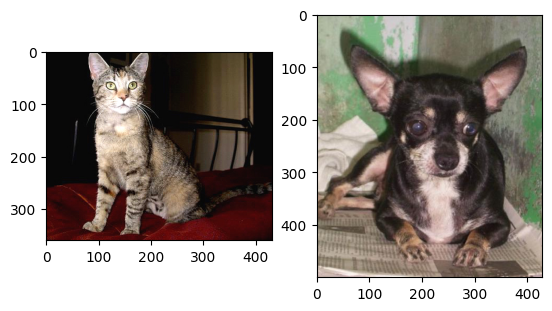

In [ ]:

plt.subplot(1,2,1)
plt.imshow(img.imread('Cat/10000.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('Dog/10722.jpg'))

In [ ]:
images = []
for i in range(10):
  im = img.imread('Cat/660.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255
image shape (346, 259, 4) maximum color level 255


In [ ]:
# função auxiliar para carregar a imagem e devolvê-la e inserir o vetor
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
gen = ImageDataGenerator()

In [ ]:
iterator = gen.flow_from_directory(
    os.getcwd(),
    target_size=(256,256),
    classes=('Dog','Cat')
)

# Encontrado 25000 imagens pertencentes a 2 classes.

Found 25000 images belonging to 2 classes.


In [ ]:
# podemos adivinhar que o iterador tem uma próxima função,
# porque todos os iteradores python têm um.

# batch = iterator.next() # Incorreto: DirectoryIterator não tem um método next()
batch = next(iterator)  # Correto: Use a função next() para obter o próximo lote do iterador
len(batch)

2

In [ ]:

# Vereficando os tipos lote dos dois elementos

print(type(batch[0]))
print(type(batch[1]))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Imprimindo a forma e o tipo das duas matrizes numpy.

print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


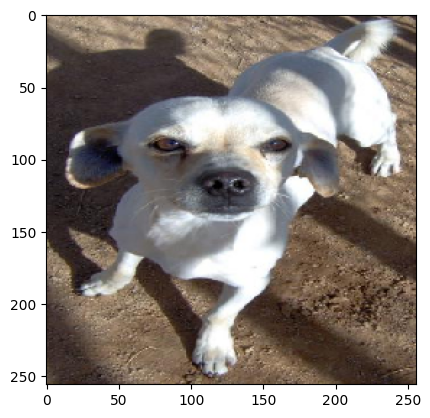

In [ ]:

# precisamos converter o array de imagens para inteiros
# antes de plotar como imshow ou pega arrays de inteiros,
# ou arrays de floats normalizados para 1.

plt.imshow(batch[0][0].astype(int))

In [ ]:

batch[1][0]

array([1., 0.], dtype=float32)

In [ ]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(int))
      assert(label[0]+label[1]==1.)
      categ = 'Dog' if label[0]>0.5 else 'Cat'
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

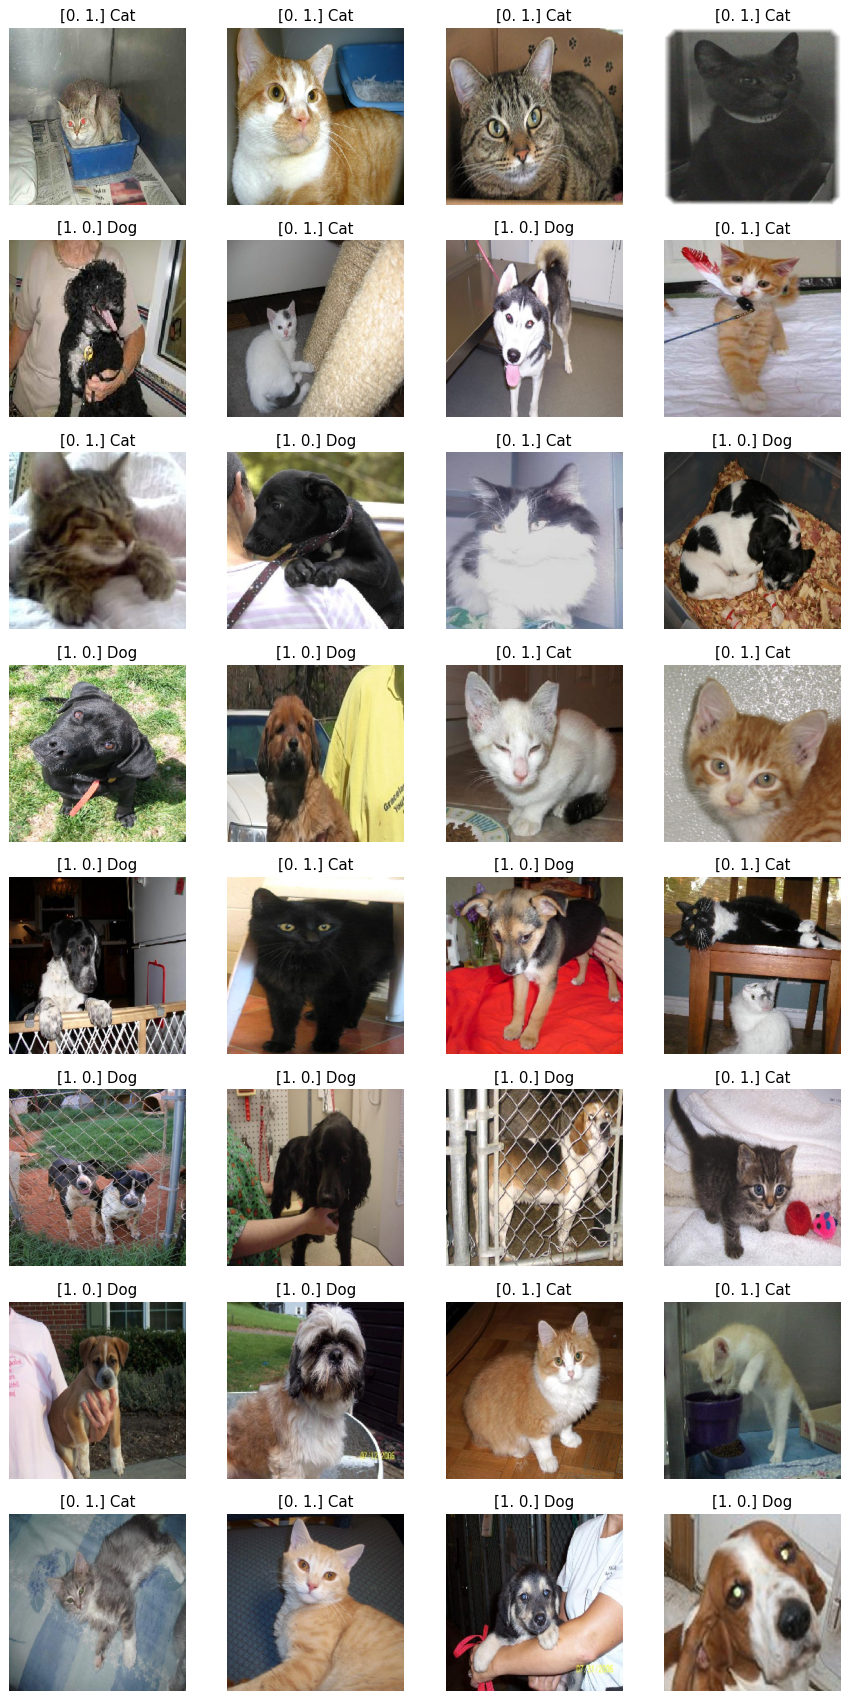

In [ ]:
plot_images(next(iterator))  # Use next(iterator) instead of iterator.next()

In [ ]:
# Dividindo as amostras de treinamento e validação com ImageDataGenerator

imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    validation_split = 0.2,
)

In [ ]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 18000 images belonging to 2 classes.
Found 499 images belonging to 2 classes.


In [ ]:
# rede neural convolucional simples
# As redes neurais convolucionais profundas são a escolha certa quando se trata de classificar imagens

model = keras.models.Sequential()

initializers = {

}
model.add(
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3),
        activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        48, 5, activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        96, 5, activation='relu',
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 24)        │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 24)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 48)        │          28,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 96)          │         115,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 311904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 311904)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │         623,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769,778 (2.94 MB)

 Trainable params: 769,778 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  # Removed workers argument
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1301/2250 ━━━━━━━━━━━━━━━━━━━━ 22:53 1s/step - acc: 0.5675 - loss: 0.6783

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3259s 1s/step - acc: 0.5970 - loss: 0.6561 - val_acc: 0.7234 - val_loss: 0.5416
Epoch 2/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3201s 1s/step - acc: 0.7383 - loss: 0.5220 - val_acc: 0.8096 - val_loss: 0.4591
Epoch 3/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3244s 1s/step - acc: 0.7970 - loss: 0.4439 - val_acc: 0.8357 - val_loss: 0.4198
Epoch 4/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3250s 1s/step - acc: 0.8173 - loss: 0.4050 - val_acc: 0.8096 - val_loss: 0.4099
Epoch 5/10
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 3201s 1s/step - acc: 0.8332 - loss: 0.3785 - val_acc: 0.8457 - val_loss: 0.3744
Epoch 6/10
1314/2250 ━━━━━━━━━━━━━━━━━━━━ 21:46 1s/step - acc: 0.8514 - loss: 0.3492

In [ ]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)

    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

    plt.show()

In [ ]:

plot_history(history, (0.65, 1.))

In [ ]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    horizontal_flip = True,
    validation_split = 0.2,
)


In [ ]:
image = img.imread('Cat/100.jpg')

def plot_transform():
    '''apply the transformation 8 times randomly'''
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols):
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')

plot_transform()

In [ ]:

imgdatagen = ImageDataGenerator(
    rescale = 1/255.,
    horizontal_flip = True,
    zoom_range = 0.3,
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()


In [ ]:

batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width),
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)


In [ ]:
model = keras.models.Sequential()

initializers = {

}
model.add(
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3),
        activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        48, 5, activation='relu',
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add(
    keras.layers.Conv2D(
        96, 5, activation='relu',
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])


In [ ]:

history_augm = model.fit(
    train_dataset,
    validation_data = val_dataset,
    workers=10,
    epochs=40,
)

In [ ]:

plot_history(history_augm, (0.65, 1))

In [ ]:
import time
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path, save_format='tf')

export_path

NameError: name 'model' is not defined